# Installing dataset

In [ ]:
!pip install datasets

# Loading and Inspecting the Dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("carblacac/twitter-sentiment-analysis")

Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'feeling'],
        num_rows: 119988
    })
    validation: Dataset({
        features: ['text', 'feeling'],
        num_rows: 29997
    })
    test: Dataset({
        features: ['text', 'feeling'],
        num_rows: 61998
    })
})

In [ ]:
test_count = len(list(ds['test'])) # counting test rows
print(test_count)

61998


In [ ]:
train_count = len(list(ds['train'])) # counting train rows
print(train_count)

119988


In [ ]:
validation_count = len(list(ds['validation'])) # counting validation rows
print(validation_count)

29997


In [ ]:
traindata =pd.DataFrame(ds['train'])
testdata =pd.DataFrame(ds['test'])
vdata =pd.DataFrame(ds['validation'])

In [ ]:
print(traindata.head())


                                                text  feeling
0  @fa6ami86 so happy that salman won.  btw the 1...        0
1  @phantompoptart .......oops.... I guess I'm ki...        0
2  @bradleyjp decidedly undecided. Depends on the...        1
3  @Mountgrace lol i know! its so frustrating isn...        1
4  @kathystover Didn't go much of any where - Lif...        1


In [ ]:
print(testdata.head())


                                                text  feeling
0  @justineville ...yeahhh. ) i'm 39 tweets from ...        1
1  @ApplesnFeathers aww. Poor baby! On your only ...        0
2  @joeymcintyre With my refunded $225 (Australia...        0
3  It's fine. Today sucks just because me those t...        0
4  Im just chilling on psp and stuff, but sitting...        0


In [ ]:
print(vdata.head())

                                                text  feeling
0              is feeling like Monday morning....ugh        0
1               @hibbsy are you covered in fur too??        1
2  20 min break in all day meeting  hope to be on...        0
3    Feels good outside... Under the shade of course        1
4  @rustyrockets http://twitpic.com/4ep9h  so you...        1


In [ ]:
print("train data")
print(traindata.tail())
print("test data")
print(testdata.tail())
print("validation data")
print(vdata.tail())


train data
                                                     text  feeling
119983            I so should be in bed but I can't sleep        0
119984  @mickeymab mine's in my profile - '77cb550 and...        1
119985  @stacyreeves Awe... I wish I could.  I am here...        0
119986  Is it me or is Vodafone UK business support ru...        0
119987  http://twitpic.com/7jmsh - My man hand with ca...        0
test data
                                                    text  feeling
61993                    @VerityRobinson how come?!    X        0
61994       Damn lost my voice no morning singing for me        0
61995  it's soooooo cold!!! my poor little fingers ar...        0
61996  @ohmymae oh  i see. make you're MSN email righ...        1
61997  OMFGGGGGGGGGGGG. I FAILED MY RECENT STATS EXAM...        0
validation data
                                                    text  feeling
29992  Just finished readin Burned by: Ellen Hopkins....        0
29993  i hate studying  psyche fi

 Dataset information

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119988 entries, 0 to 119987
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     119988 non-null  object
 1   feeling  119988 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61998 entries, 0 to 61997
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     61998 non-null  object
 1   feeling  61998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 968.8+ KB


In [ ]:
vdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     29997 non-null  object
 1   feeling  29997 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.8+ KB


#  Checking for Missing Values

In [ ]:
print(traindata.isnull().sum())
print(testdata.isnull().sum())
print(vdata.isnull().sum())

text       0
feeling    0
dtype: int64
text       0
feeling    0
dtype: int64
text       0
feeling    0
dtype: int64


Visualizing Missing Values


Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.496x0.77)
Axes(0.125,0.11;0.3968x0.77)


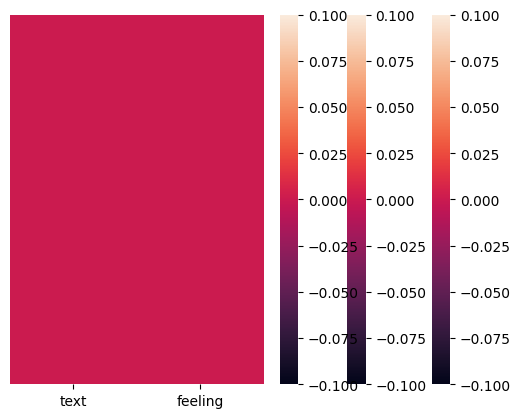

In [ ]:
print(sns.heatmap(traindata.isnull(),yticklabels = False ) )
print(sns.heatmap(testdata.isnull(),yticklabels = False ) )
print(sns.heatmap(vdata.isnull(),yticklabels = False ) )

Checking for Duplicate Values

In [ ]:
traindata.duplicated().sum()


0

# Data Preprocessing

Cleaning urls and @ words

In [ ]:
import re
def www(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)

    return text

traindata["text"] = traindata["text"].astype(str).apply(www)
testdata["text"] = testdata["text"].astype(str).apply(www)
vdata["text"] = vdata["text"].astype(str).apply(www)

In [ ]:
print('TRAIN')
print(traindata.head())
print("TEST")
print(testdata.head())
print('VALIDATION')
print(vdata.head())

TRAIN
                                                text  feeling
0   so happy that salman won.  btw the 14sec clip...        0
1   .......oops.... I guess I'm kinda out of it.....        0
2   decidedly undecided. Depends on the situation...        1
3           lol i know! its so frustrating isnt it?!        1
4   Didn't go much of any where - Life took over ...        1
TEST
                                                text  feeling
0             ...yeahhh. ) i'm 39 tweets from 1,600!        1
1         aww. Poor baby! On your only REAL day off.        0
2   With my refunded $225 (Australian ticket pric...        0
3  It's fine. Today sucks just because me those t...        0
4  Im just chilling on psp and stuff, but sitting...        0
VALIDATION
                                                text  feeling
0              is feeling like Monday morning....ugh        0
1                       are you covered in fur too??        1
2  20 min break in all day meeting  hope to be o

In [ ]:
print("train data")
print(traindata.tail())
print("test data")
print(testdata.tail())
print("validation data")
print(vdata.tail())


train data
                                                     text  feeling
119983            I so should be in bed but I can't sleep        0
119984   mine's in my profile - '77cb550 and hector's ...        1
119985   Awe... I wish I could.  I am here this weeken...        0
119986  Is it me or is Vodafone UK business support ru...        0
119987   - My man hand with cat scratch. Someone said ...        0
test data
                                                    text  feeling
61993                                    how come?!    X        0
61994       Damn lost my voice no morning singing for me        0
61995  it's soooooo cold!!! my poor little fingers ar...        0
61996   oh  i see. make you're MSN email right now!  ...        1
61997  OMFGGGGGGGGGGGG. I FAILED MY RECENT STATS EXAM...        0
validation data
                                                    text  feeling
29992  Just finished readin Burned by: Ellen Hopkins....        0
29993  i hate studying  psyche fi

removeing short data which is length is less than 4




In [ ]:
traindata = traindata[traindata["text"].str.len() > 4]
print(traindata.head())
testdata = testdata[testdata["text"].str.len() > 4]
print(testdata.head())
vdata = vdata[vdata["text"].str.len() > 4]
print(vdata.head())

                                                text  feeling
0   so happy that salman won.  btw the 14sec clip...        0
1   .......oops.... I guess I'm kinda out of it.....        0
2   decidedly undecided. Depends on the situation...        1
3           lol i know! its so frustrating isnt it?!        1
4   Didn't go much of any where - Life took over ...        1
                                                text  feeling
0             ...yeahhh. ) i'm 39 tweets from 1,600!        1
1         aww. Poor baby! On your only REAL day off.        0
2   With my refunded $225 (Australian ticket pric...        0
3  It's fine. Today sucks just because me those t...        0
4  Im just chilling on psp and stuff, but sitting...        0
                                                text  feeling
0              is feeling like Monday morning....ugh        0
1                       are you covered in fur too??        1
2  20 min break in all day meeting  hope to be on...        0
3    Fee

In [ ]:
print("TRAIN DATA",traindata['feeling'].value_counts())
print("TEST DATA",testdata['feeling'].value_counts())
print("VALIDATION DATA ",vdata['feeling'].value_counts())

TRAIN DATA feeling
1    59880
0    59803
Name: count, dtype: int64
TEST DATA feeling
1    30948
0    30877
Name: count, dtype: int64
VALIDATION DATA  feeling
0    15016
1    14907
Name: count, dtype: int64


# Visualizing Sentiment Distribution

<Axes: title={'center': ' train feeling distribution'}, xlabel='feeling', ylabel='Count'>

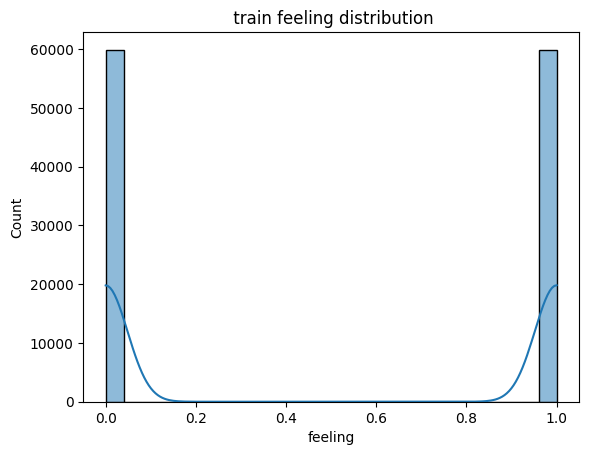

In [ ]:
k=sns.histplot(traindata["feeling"], kde=True)
k.set_title(" train feeling distribution")
k

<Axes: title={'center': 'Train Data Distribution '}>

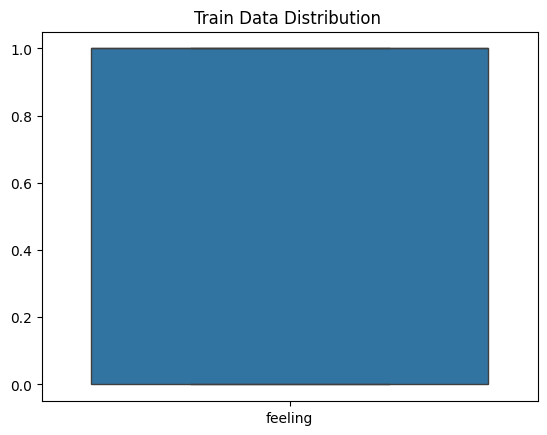

In [ ]:
x = sns.boxplot( data=testdata)
x.set_title('Train Data Distribution ')

x

<Axes: title={'center': 'validation Data Distribution'}>

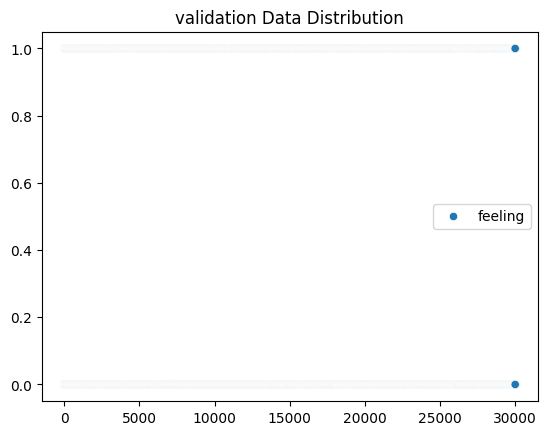

In [ ]:
g = sns.scatterplot(data=vdata)
g.set_title('validation Data Distribution')
g

# Tokenizing Text Data

In [ ]:
from transformers import BertTokenizer,BertForSequenceClassification,AdamW


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [ ]:
text = traindata['text'].values

In [ ]:
text

array([' so happy that salman won.  btw the 14sec clip is truely a teaser',
       " .......oops.... I guess I'm kinda out of it.... Blonde moment -blushes- epic fail",
       " decidedly undecided. Depends on the situation. When I'm out with the people I'll be in Chicago with? Maybe.",
       ...,
       ' Awe... I wish I could.  I am here this weekend for 2 weddings but I am crazy busy tonight finishing programs 4 bride #1.',
       "Is it me or is Vodafone UK business support rubbish? - Report a problem and you'll be ignored",
       ' - My man hand with cat scratch. Someone said I have a Y chromosome somewhere in there'],
      dtype=object)

In [ ]:
input_ids = []
attention_mask = []
for i in text:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(traindata['feeling'].values)
dataset_train = TensorDataset(input_ids, attention_mask, labels)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
input_ids = []
attention_mask = []
for i in testdata["text"]:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(testdata['feeling'].values)
dataset_test = TensorDataset(input_ids, attention_mask, labels)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
input_ids = []
attention_mask = []
for i in vdata["text"]:
    encoded_data = tokenizer.encode_plus(
    i,
    add_special_tokens=True,
    max_length=64,
    pad_to_max_length = True,
    return_attention_mask= True,
    return_tensors='pt')
    input_ids.append(encoded_data['input_ids'])
    attention_mask.append(encoded_data['attention_mask'])
input_ids = torch.cat(input_ids,dim=0)
attention_mask = torch.cat(attention_mask,dim=0)
labels = torch.tensor(vdata['feeling'].values)
dataset_val = TensorDataset(input_ids, attention_mask, labels)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Creating Tensor Datasets

In [ ]:
from torch.utils.data import DataLoader,SequentialSampler,RandomSampler,TensorDataset,random_split

Creating Dataloaders

In [ ]:
train_dl = DataLoader(dataset_train,sampler = RandomSampler(dataset_train),
                     batch_size = 32)
val_dl = DataLoader(dataset_val,sampler = SequentialSampler(dataset_val),
                     batch_size = 32)

In [ ]:
len(train_dl),len(val_dl)

(3741, 936)

#  Imoprting  BERT Model

In [ ]:
model = BertForSequenceClassification.from_pretrained(
'bert-base-uncased',
num_labels = 2,
output_attentions = False,
output_hidden_states = False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
optimizer = AdamW(model.parameters(),lr = 2e-5,eps=1e-8)

/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# Configuring Optimizer and Scheduler

In [ ]:
from transformers import get_linear_schedule_with_warmup
epochs = 1
total_steps = len(train_dl)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,
                                           num_training_steps=total_steps)

In [ ]:
def accuracy(preds,labels):
    pred_flat = np.argmax(preds,axis=1).flatten()
    label_flat = labels.flatten()
    return np.sum(pred_flat==label_flat)/len(label_flat)

In [ ]:
def evaluate(dataloader_test):
    model.eval()
    loss_val_total = 0
    predictions,true_vals = [],[]
    for batch in dataloader_test:
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids':batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }
        with torch.no_grad():
            outputs = model(**inputs)
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg = loss_val_total / len(dataloader_test)
    predictions = np.concatenate(predictions,axis=0)
    true_vals = np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

# model training

In [ ]:
from tqdm.notebook import tqdm
torch.cuda.empty_cache()
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(train_dl, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(train_dl)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(val_dl)
    val_acc = accuracy(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'Accuracy: {val_acc}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/3741 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.37920724397211014
Validation loss: 0.33793741564115143
Accuracy: 0.8551950005012866


saveing the model

In [ ]:
output_dir = './'
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./tokenizer_config.json',
 './special_tokens_map.json',
 './vocab.txt',
 './added_tokens.json')

In [ ]:
from transformers import BertTokenizer,BertForSequenceClassification
import torch

print('Loading BERT tokenizer...')
output_dir = './'
tokenizer = BertTokenizer.from_pretrained(output_dir)
model_loaded = BertForSequenceClassification.from_pretrained(output_dir)

Loading BERT tokenizer...


Defining Sentiment Prediction Function

In [ ]:
def Sentiment(sent):
    output_dir = './'
    tokenizer = BertTokenizer.from_pretrained(output_dir)
    model_loaded = BertForSequenceClassification.from_pretrained(output_dir)
    encoded_dict = tokenizer.encode_plus(
                        sent,
                        add_special_tokens = True,
                        max_length = 64,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )

    input_id = encoded_dict['input_ids']

    attention_mask = encoded_dict['attention_mask']
    input_id = torch.LongTensor(input_id)
    attention_mask = torch.LongTensor(attention_mask)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_loaded = model_loaded.to(device)
    input_id = input_id.to(device)
    attention_mask = attention_mask.to(device)

    with torch.no_grad():
        outputs = model_loaded(input_id, token_type_ids=None, attention_mask=attention_mask)

    logits = outputs[0]
    index = logits.argmax()
    return index

# testing the model

positive message

In [ ]:
ans = Sentiment('i am winer')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
if ans == 1:
    print("Positive")
else:
    print("Negative")

Positive


In [ ]:
j = Sentiment('i hate u')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
if j == 1:
    print("Positive")
else:
    print("Negative")

Negative
